In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
path = "D:/Program/dataset/KDD2018/KDD_dataset/"

In [3]:
bj_aq = pd.read_csv(path+"beijing_17_18_aq.csv")
print(bj_aq.shape)
bj_aq.head()

(311010, 8)


,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0


In [4]:
bj_aq.describe()

,PM2.5,PM10,NO2,CO,O3,SO2
count,290621.000000,227747.000000,292359.000000,268197.000000,290589.000000,292462.000000
mean,58.785570,88.059259,45.792457,0.960677,55.692755,8.981003
std,66.113851,89.292875,32.065045,1.001856,53.821424,11.702594
min,2.000000,5.000000,1.000000,0.100000,1.000000,1.000000
25%,16.000000,37.000000,20.000000,0.400000,12.000000,2.000000
50%,39.000000,70.000000,39.000000,0.700000,45.000000,5.000000
75%,77.000000,113.000000,66.000000,1.200000,79.000000,11.000000
max,1004.000000,3000.000000,300.000000,15.000000,504.000000,307.000000


In [5]:
bj_aq.isnull().any()

stationId    False
utc_time     False
PM2.5         True
PM10          True
NO2           True
CO            True
O3            True
SO2           True
dtype: bool

In [6]:
bj_aq.dtypes

stationId     object
utc_time      object
PM2.5        float64
PM10         float64
NO2          float64
CO           float64
O3           float64
SO2          float64
dtype: object

In [7]:
# See how many data values are missing

bj_aq[(bj_aq['PM2.5'].isnull()==True) & (bj_aq['PM10'].isnull()==True) & 
     (bj_aq['NO2'].isnull()==True) & (bj_aq['CO'].isnull()==True) & 
     (bj_aq['O3'].isnull()==True) & (bj_aq['SO2'].isnull()==True)]

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
52,aotizhongxin_aq,2017-01-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
182,aotizhongxin_aq,2017-01-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
705,aotizhongxin_aq,2017-02-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN
706,aotizhongxin_aq,2017-02-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
707,aotizhongxin_aq,2017-02-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
708,aotizhongxin_aq,2017-02-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN
709,aotizhongxin_aq,2017-02-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN
710,aotizhongxin_aq,2017-02-01 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN
711,aotizhongxin_aq,2017-02-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
712,aotizhongxin_aq,2017-02-01 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Keep only the rows with at least 3 non-na values

bj_aq = bj_aq.dropna(thresh=3)
bj_aq

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0
5,aotizhongxin_aq,2017-01-01 19:00:00,429.0,NaN,141.0,6.5,3.0,9.0
6,aotizhongxin_aq,2017-01-01 20:00:00,211.0,NaN,110.0,3.3,NaN,11.0
7,aotizhongxin_aq,2017-01-01 21:00:00,116.0,NaN,87.0,2.2,4.0,13.0
8,aotizhongxin_aq,2017-01-01 22:00:00,51.0,NaN,58.0,1.3,26.0,14.0
9,aotizhongxin_aq,2017-01-01 23:00:00,38.0,NaN,55.0,1.1,28.0,14.0


In [9]:
nan_data = bj_aq[bj_aq.isnull().values==True]
nan_data

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
5,aotizhongxin_aq,2017-01-01 19:00:00,429.0,NaN,141.0,6.5,3.0,9.0
6,aotizhongxin_aq,2017-01-01 20:00:00,211.0,NaN,110.0,3.3,NaN,11.0
6,aotizhongxin_aq,2017-01-01 20:00:00,211.0,NaN,110.0,3.3,NaN,11.0
7,aotizhongxin_aq,2017-01-01 21:00:00,116.0,NaN,87.0,2.2,4.0,13.0
8,aotizhongxin_aq,2017-01-01 22:00:00,51.0,NaN,58.0,1.3,26.0,14.0
9,aotizhongxin_aq,2017-01-01 23:00:00,38.0,NaN,55.0,1.1,28.0,14.0
10,aotizhongxin_aq,2017-01-02 00:00:00,21.0,NaN,40.0,0.7,42.0,16.0
11,aotizhongxin_aq,2017-01-02 01:00:00,16.0,NaN,40.0,0.8,44.0,18.0
12,aotizhongxin_aq,2017-01-02 02:00:00,23.0,NaN,42.0,0.7,45.0,17.0
13,aotizhongxin_aq,2017-01-02 03:00:00,18.0,NaN,30.0,0.6,59.0,14.0


In [10]:
# According to the above data, 
# it can be seen that after deleting the 3 NaN, 
# there are 295,020 remaining, and there are 108,145 lines with NaN.

nan_map = {}

nan_map['PM2.5'] = len(nan_data[nan_data['PM2.5'].isnull()==True])
nan_map['PM10'] = len(nan_data[nan_data['PM10'].isnull()==True])
nan_map['NO2'] = len(nan_data[nan_data['NO2'].isnull()==True])
nan_map['CO'] = len(nan_data[nan_data['CO'].isnull()==True])
nan_map['O3'] = len(nan_data[nan_data['O3'].isnull()==True])
nan_map['SO2'] = len(nan_data[nan_data['SO2'].isnull()==True])

nan_map

{'CO': 36694,
 'NO2': 5746,
 'O3': 8253,
 'PM10': 77830,
 'PM2.5': 7318,
 'SO2': 5652}

In [12]:
bj_aq = bj_aq.fillna(0)
bj_aq.shape

(295020, 8)

In [13]:
bj_aq.describe()

,PM2.5,PM10,NO2,CO,O3,SO2
count,295020.000000,295020.000000,295020.000000,295020.000000,295020.000000,295020.000000
mean,57.909027,67.979229,45.379422,0.873333,54.856288,8.903132
std,66.004735,86.718621,32.212368,0.994353,53.843514,11.681462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,12.000000,19.000000,0.300000,10.000000,2.000000
50%,38.000000,50.000000,39.000000,0.600000,44.000000,5.000000
75%,76.000000,98.000000,66.000000,1.100000,78.000000,11.000000
max,1004.000000,3000.000000,300.000000,15.000000,504.000000,307.000000


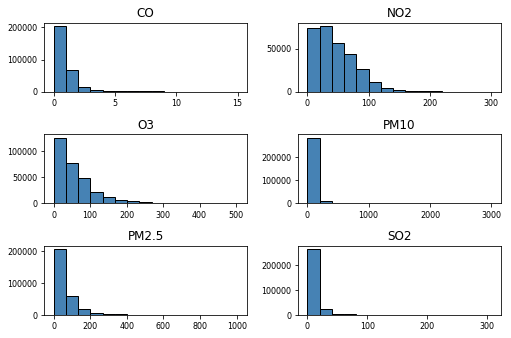

In [14]:
bj_aq.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)  
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [15]:
bj_aq.to_csv(path+'process_data/bj_17_18_aq_cleaned.csv', index=False)